In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
%matplotlib inline
import datetime
from datetime import date, timedelta
from math import pi
import pickle

In [2]:
# 1. Data Pre-processing -- Loading the Fifa dataset
df=pd.read_csv('fifa.csv')
df.head(7)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null

In [4]:
# To view statistical charactersticks of data
df.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [5]:
# Checking the null values
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

In [5]:
# 2. Data Pre-processing -- Dropping Unnecessary columns
df.drop(["ID","Loaned From","Photo","Flag","Club Logo"],axis=1,inplace=True)
df.head(5)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
# 3. Data Pre-processing -- Converting datatypes
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

#Create float Value column
df['Value'] = df['Value'].apply(value_to_int)

#Create float Wage Column
df['Wage'] = df['Wage'].apply(value_to_int)

print(df['Value'].head())
print(df['Wage'].head())

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64
0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64


In [7]:
# Convert to int with only year
def joined_year(year):
    try:
        yr=year.split(",")
        value = int(yr[-1])
        
    
    except ValueError:
        value = 0
    return value

df['Joined'] = df['Joined'].astype(str)
df['Joined'] = df['Joined'].apply(joined_year)  

In [8]:
df["Contract Valid Until"].dtype

dtype('O')

In [9]:
# 'Contract Valid Until (Convert to datetime type)'
 
def contract_year(year):
    try:
        yr=year.split(",")
        value = int(yr[-1])
        
    
    except ValueError:
        value = 0
    return value

df['Contract Valid Until'] = df['Contract Valid Until'].astype(str)
df['Contract Valid Until'] = df['Contract Valid Until'].apply(contract_year)

In [10]:
df["Contract Valid Until"].dtype

dtype('int64')

In [11]:
# Height: Convert to Float with decimal points
def parse_ht(ht):
    # format: 7'0
    ht_ = ht.split("''")
    ft_ = float(ht_[0])
    in_ = float(ht_[1])
    return round(((12*ft_) + in_)*2.54) 
  
df['Height'] = df['Height'].apply(lambda x:parse_ht(x))

ValueError: could not convert string to float: "5'7"

In [12]:
# Height: Convert to Float with decimal points
df['Weight'] = df['Weight'].astype(str).str.replace('lbs', '').astype(float)

In [13]:
#Create float Wage Column
df['Release Clause'] = df['Release Clause'].astype(str)
df['Release Clause'] = df['Release Clause'].apply(value_to_int)

print(df['Release Clause'].head())

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64


# 4.	Check for missing values and do a mean imputation where necessary.

In [14]:
df.isnull().sum()

Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                         0
Wage                          0
Preferred Foot               48
International Reputation     48
Weak Foot                    48
Skill Moves                  48
Work Rate                    48
Body Type                    48
Position                     60
Jersey Number                60
Joined                        0
Contract Valid Until          0
Height                       48
Weight                       48
Crossing                     48
Finishing                    48
HeadingAccuracy              48
ShortPassing                 48
Volleys                      48
Dribbling                    48
Curve                        48
FKAccuracy                   48
LongPassing                  48
BallControl                  48
Acceleration                 48
SprintSp

In [15]:
# Left foot = 0 & Right foot = 1
df['Preferred Foot'] = df['Preferred Foot'].apply(lambda x: 0 if x == 'Left' else 1)

In [16]:
#Add club reputation column
df['Club_Reputation'] =  df['International Reputation'].groupby(df['Club']).transform('mean')
df.Club_Reputation.head(8)

0    2.242424
1    2.520000
2    2.233333
3    2.090909
4    2.090909
5    2.121212
6    2.090909
7    2.242424
Name: Club_Reputation, dtype: float64

In [17]:
# Fill in clubs for no clubs
df.Club=df.Club.fillna("No_Club")

In [18]:
#Fill in miscellaneous body types 
df['Body Type'].replace({'Messi':'Lean', 
                           'Neymar':'Lean', 
                           'Shaqiri':'Stocky', 
                           'Courtois':'Normal', 
                           'Akinfenwa':'Stocky',
                           'PLAYER_BODY_TYPE_25':'Lean',
                           'C. Ronaldo':'Normal'}, inplace = True)

In [19]:
#Drop rows with missing Body Type - these values also are missing most other columns
df.dropna(subset=['Body Type'], inplace = True)

In [20]:
df.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Club_Reputation
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,0,5.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2.242424
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,1,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2.520000
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,1,5.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2.233333


# Exploratory Analysis

Mean Overall =  66.25
Median Overall =  66.0
SD Overall =  6.91


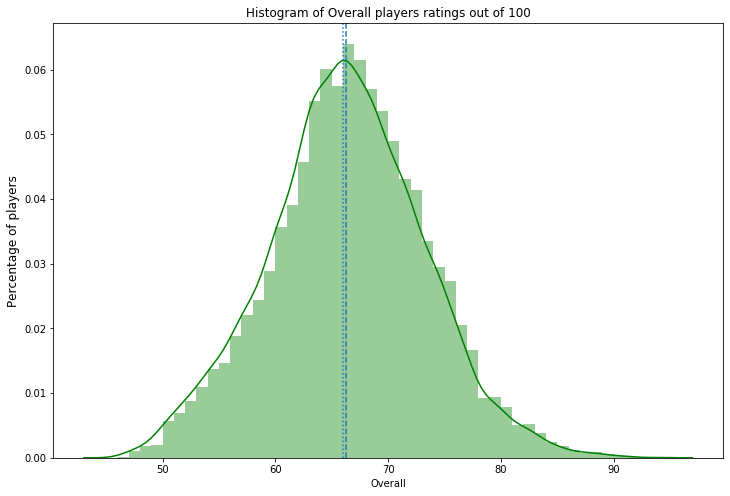

In [21]:
 # 1. Overall rating of all the players
    
plt.figure(figsize = (12,8))
ax = sns.distplot(df['Overall'], bins = 48, kde = True, color = 'g')

ax.set_ylabel(ylabel='Percentage of players', fontsize=12)

plt.axvline(x =df['Overall'].mean(), ymin = 0, ymax = 1, linestyle = '--')
plt.axvline(x =df['Overall'].median(), ymin = 0, ymax = 1, linestyle = ':')

print('Mean Overall = ', round(df['Overall'].mean(),2))
print('Median Overall = ', round(df['Overall'].median(),2))
print('SD Overall = ', round(df['Overall'].std(),2))


plt.title('Histogram of Overall players ratings out of 100')
plt.show()

C:\Users\satyam\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\satyam\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


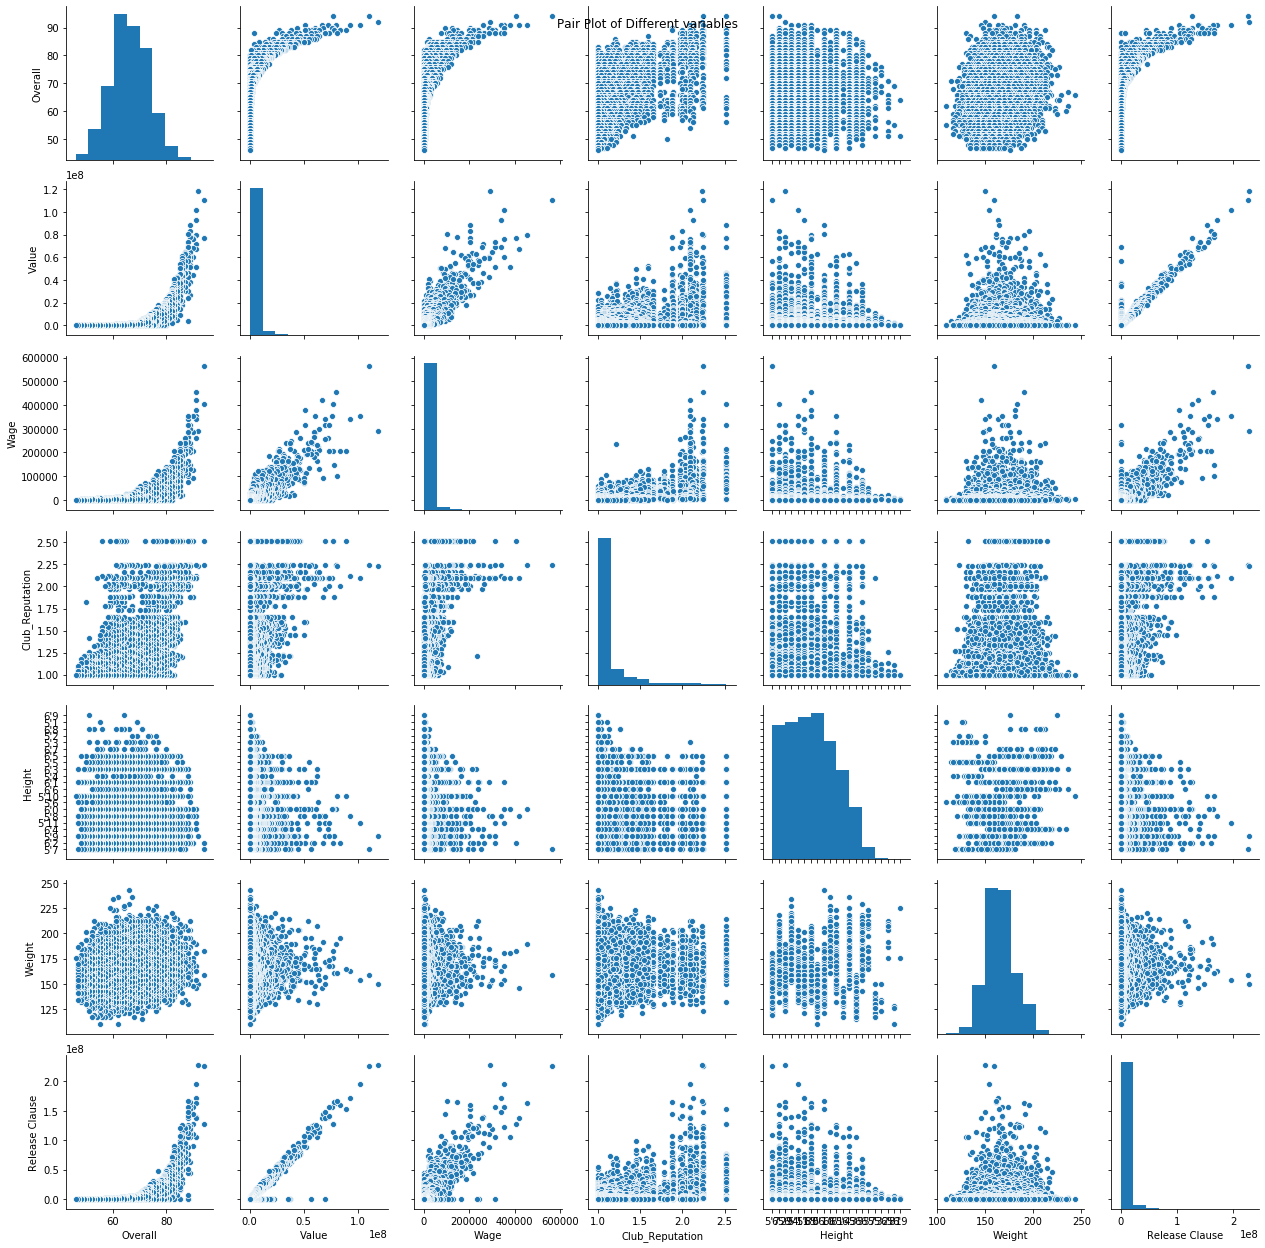

In [22]:
# Generate pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


sns.pairplot(df, vars=["Overall", "Value","Wage","Club_Reputation","Height","Weight","Release Clause"])
# Title 
plt.suptitle("Pair Plot of Different variables")
plt.show()

# Q3 Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.


In [ ]:
df["Contract Valid Until"].dtype

In [23]:
data_1=df[df["Contract Valid Until"] <= 2020]   #masking donr on the dataframe for contract valid upto 2020.

In [24]:
data_1.sort_values(by=["Overall"],ascending=False,inplace=True)

C:\Users\satyam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
data_20=data_1.head(20)      #taking only first 20 players after sorting with overall.
data_20

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Club_Reputation
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1,4.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2.090909
6,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,1,4.0,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,2.090909
8,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,1,4.0,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,2.090909
5,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,1,4.0,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,2.121212
12,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,1,3.0,...,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0,1.878788
13,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,0,4.0,...,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0,2.090909
21,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,1,4.0,...,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0,2.233333
24,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,0,4.0,...,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0,2.520000
28,J. Rodríguez,26,Colombia,88,89,FC Bayern München,69500000.0,315000.0,0,4.0,...,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,0.0,2.517241
31,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,1,3.0,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0,2.000000


In [26]:
# What would the average wage for this set of players be?
print("Average wage this set of players is:",data_20.Wage.mean())

Average wage this set of players is: 220100.0


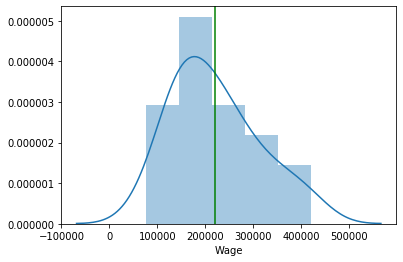

In [27]:
sns.distplot(data_20.Wage,bins=5)
plt.axvline(data_20.Wage.mean(),color="g")
plt.show()

In [28]:
print("Average age this set of players is:",data_20.Age.mean())

Average age this set of players is: 30.45


In [29]:
data_20.Value.corr(other=data_20.Overall)

0.5376602976016893

# Generate tables containing the top 5 players by Overall rating for each unique position.

In [30]:
data_5=df.groupby(by="Position")

In [31]:
mylist=[]
for name,values in data_5:
    mylist.append(name)

In [32]:
d1=pd.DataFrame()
for i in mylist:
        
    top=data_5.get_group(i).sort_values(by=["Overall"],ascending=False).head(5)
    d1=pd.concat((d1,top),axis=0)

In [33]:
d1

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Club_Reputation
17,A. Griezmann,27,France,89,90,Atlético Madrid,78000000.0,145000.0,0,4.0,...,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0,1.878788
31,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,1,3.0,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0,2.000000
61,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000.0,195000.0,1,3.0,...,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,104700000.0,1.969697
66,T. Müller,28,Germany,86,86,FC Bayern München,45000000.0,135000.0,1,4.0,...,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74300000.0,2.517241
74,M. Özil,29,Germany,86,86,Arsenal,43500000.0,190000.0,0,4.0,...,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000.0,2.030303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,1,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2.520000
10,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000.0,205000.0,1,4.0,...,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127100000.0,2.517241
16,H. Kane,24,England,89,91,Tottenham Hotspur,83500000.0,205000.0,1,3.0,...,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,160700000.0,2.000000
23,S. Agüero,30,Argentina,89,89,Manchester City,64500000.0,300000.0,1,4.0,...,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,119300000.0,2.090909


In [34]:
d1.Name.duplicated().any()

False

In [35]:
# What is the average wage one can expect to pay for the top 5 in every position?
d1.groupby(by="Position").Wage.mean()

Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64

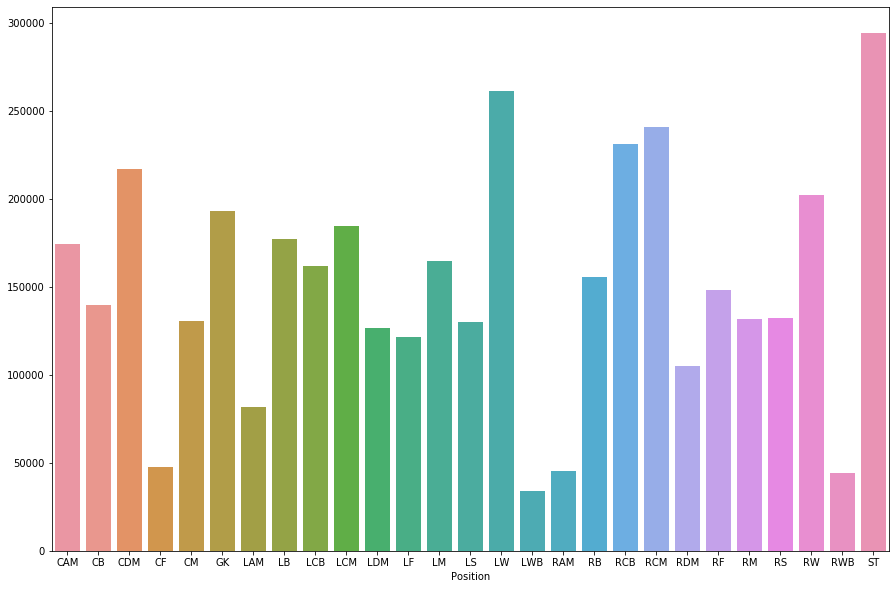

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(d1.groupby(by="Position").Wage.mean().index,d1.groupby(by="Position").Wage.mean().values)